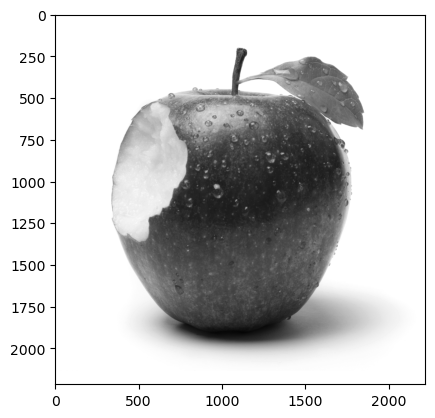

In [30]:
import os
import tensorflow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import pickle 

DATA_DIR = "C:/Users/muhle/Desktop/Code/DataSets/FruitAI"
CATEGORIES = ['Apple', 'Banana', 'Beetroot', 'BellPepper', 'Cabbage', 'Carrot', 'Cauliflower', 'Chilli', 'Corn', 'Cucumber', 'Eggplant', 'Garlic', 'Ginger', 'Grapes', 'Jalapeno', 'Kiwi', 'Lemon', 'Lettuce', 'Mango', 'Onion', 'Orange', 'Paprika', 'Pear', 'Peas', 'Pineapple', 'Pomegranat', 'Potato', 'Raddish', 'Spinach', 'Tomato', 'Watermelon']

for category in CATEGORIES: 
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        break
    break

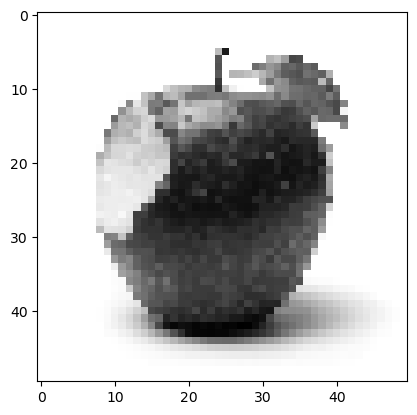

In [31]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [32]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Bild zu einen Array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  # Hinzufügen zu unserer Liste trainings_data
            except Exception as e:
                print(e)
                pass
create_training_data()

 73%|███████▎  | 66/90 [00:01<00:00, 82.01it/s]

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|██████████| 84/84 [00:02<00:00, 39.89it/s]


In [33]:
print(len(training_data))

2670


In [34]:
random.shuffle(training_data)

In [35]:
for sample in training_data[:10]:
    print(sample[1])

18
7
22
9
9
3
18
14
5
8


In [41]:
#Input (X) und Output (y) definieren
X = []
y = []


In [42]:
for features, label in training_data: 
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [43]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

In [44]:
X[1]

array([[[211],
        [201],
        [197],
        ...,
        [152],
        [139],
        [144]],

       [[209],
        [208],
        [199],
        ...,
        [146],
        [146],
        [146]],

       [[209],
        [210],
        [215],
        ...,
        [143],
        [140],
        [150]],

       ...,

       [[189],
        [171],
        [192],
        ...,
        [ 22],
        [ 15],
        [ 24]],

       [[188],
        [173],
        [169],
        ...,
        [ 24],
        [ 24],
        [ 17]],

       [[180],
        [180],
        [181],
        ...,
        [ 29],
        [ 28],
        [ 19]]], dtype=uint8)